# Comparación de clasificadores precompliades

En este notebook se compara la eficiencia de los clasificadores precompilados usados:
- Textblob
- Vader
- Sentiment Analysis Spanish

In [26]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn import metrics

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sentiment_analysis_spanish import sentiment_analysis


In [27]:
df = pd.read_csv('../data/samples/evaluation1_labeled.csv', index_col=1)
df.labels = df.labels.map({0:0, 1:2, 2:1, 3:1})
df.rename(columns={'labels': 'label'}, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

df2 = pd.read_csv('../data/samples/vacunes_100rt_evaluation2_label.csv', index_col=0)
df2.label = df2.label.map({'neg': 0, 'neu': 1, 'irr': 1, 'pos': 2})

df = df.append(df2)

df.drop_duplicates(subset='content', keep='first', inplace=True)


df_blob = pd.read_csv('../data/EN/vacunes_100rt_en_textblob.csv', index_col=0)


df['polarity'] = df_blob.loc[df.index, 'polarity']
df['subjectivity'] = df_blob.loc[df.index, 'subjectivity']


sid = SentimentIntensityAnalyzer()
df_blob['scores'] = df_blob['content'].apply( lambda x: sid.polarity_scores(x)['compound'] )

df['polarity_vader'] = df_blob.loc[df.index, 'scores']

from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
df['polarity_spanish'] = df.content.apply(lambda x: sentiment.sentiment(x))

df = df[df.label.notna()]
orig_df = df.copy()



/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/marti/.pyenv/versions/capstone/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [35]:
df.loc[ (df.polarity >= -1) & (df.polarity <= .05), 'polarity_' ] = 0
df.loc[ (df.polarity > -.05) & (df.polarity < .05), 'polarity_' ] = 1
df.loc[ (df.polarity >= .05) & (df.polarity <= 1), 'polarity_' ] = 2

df.loc[ (df.polarity_vader >= -1) & (df.polarity_vader <= .05), 'polarity_vader_' ] = 0
df.loc[ (df.polarity_vader > -.05) & (df.polarity_vader < .05), 'polarity_vader_' ] = 1
df.loc[ (df.polarity_vader >= .05) & (df.polarity_vader <= 1), 'polarity_vader_' ] = 2

df.loc[ (df.polarity_spanish >= 0) & (df.polarity_spanish <= .05), 'polarity_spanish_' ] = 0
df.loc[ (df.polarity_spanish > .05) & (df.polarity_spanish < .95), 'polarity_spanish_' ] = 1
df.loc[ (df.polarity_spanish >= .95) & (df.polarity_spanish <= 1), 'polarity_spanish_' ] = 2

df['polarity_textblob_vader'] = df.polarity * .5 + df.polarity_vader * .5

df.loc[ (df.polarity_textblob_vader >= -1) & (df.polarity_textblob_vader <= .05), 'polarity_textblob_vader_' ] = 0
df.loc[ (df.polarity_textblob_vader > -.05) & (df.polarity_textblob_vader < .05), 'polarity_textblob_vader_' ] = 1
df.loc[ (df.polarity_textblob_vader >= .05) & (df.polarity_textblob_vader <= 1), 'polarity_textblob_vader_' ] = 2


<AxesSubplot:>

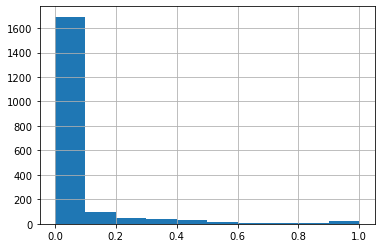

In [36]:
df['polarity_spanish'].hist()

# TextBlob

              precision    recall  f1-score   support

         0.0       0.10      0.17      0.12       200
         1.0       0.72      0.39      0.51      1382
         2.0       0.22      0.50      0.31       384

    accuracy                           0.39      1966
   macro avg       0.35      0.35      0.31      1966
weighted avg       0.56      0.39      0.43      1966



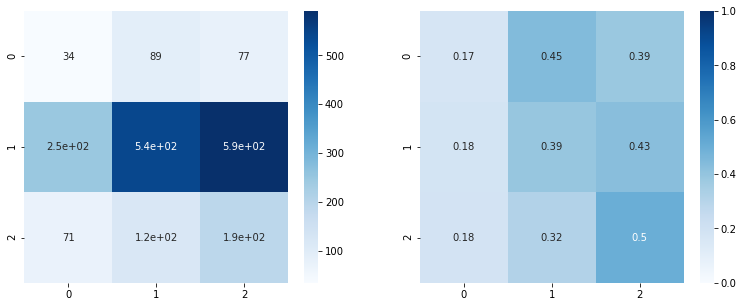

In [37]:
y = df.label
y_blob = df.polarity_
conf_matrix = metrics.confusion_matrix(y, y_blob)
conf_matrix_normalized = np.apply_along_axis(lambda x: x/ x.sum(), 1, conf_matrix)
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.heatmap(conf_matrix, annot=True, ax=ax[0], cmap=sns.color_palette("Blues", as_cmap=True))
sns.heatmap(conf_matrix_normalized, vmin=0, vmax=1, center=.5, annot=True, ax=ax[1], cmap=sns.color_palette("Blues", as_cmap=True))
print(metrics.classification_report(y, y_blob))

# Vader

              precision    recall  f1-score   support

         0.0       0.11      0.38      0.17       200
         1.0       0.73      0.24      0.36      1382
         2.0       0.23      0.49      0.32       384

    accuracy                           0.30      1966
   macro avg       0.36      0.37      0.28      1966
weighted avg       0.57      0.30      0.33      1966



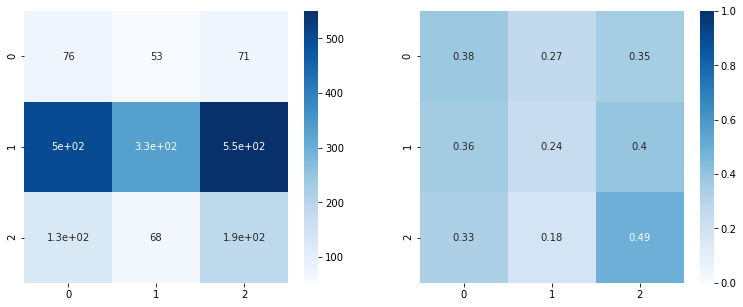

In [38]:
y = df.label
y_vader = df.polarity_vader_
conf_matrix = metrics.confusion_matrix(y, y_vader)
conf_matrix_normalized = np.apply_along_axis(lambda x: x/ x.sum(), 1, conf_matrix)
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.heatmap(conf_matrix, annot=True, ax=ax[0], cmap=sns.color_palette("Blues", as_cmap=True))
sns.heatmap(conf_matrix_normalized, vmin=0, vmax=1, center=.5, annot=True, ax=ax[1], cmap=sns.color_palette("Blues", as_cmap=True))
print(metrics.classification_report(y, y_vader))

## Spanish sentiment analyzer

              precision    recall  f1-score   support

         0.0       0.11      0.38      0.17       200
         1.0       0.73      0.24      0.36      1382
         2.0       0.23      0.49      0.32       384

    accuracy                           0.30      1966
   macro avg       0.36      0.37      0.28      1966
weighted avg       0.57      0.30      0.33      1966



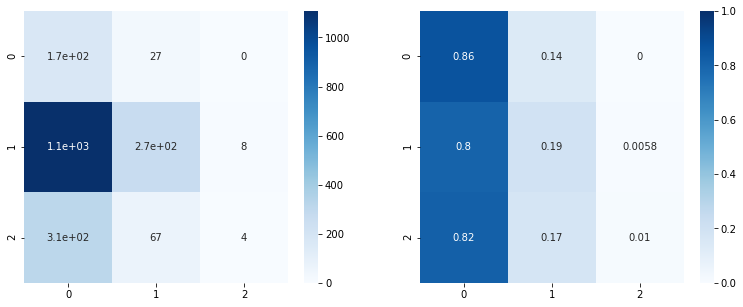

In [39]:
y = df.label
y_spanish = df.polarity_spanish_
conf_matrix = metrics.confusion_matrix(y, y_spanish)
conf_matrix_normalized = np.apply_along_axis(lambda x: x/ x.sum(), 1, conf_matrix)
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.heatmap(conf_matrix, annot=True, ax=ax[0], cmap=sns.color_palette("Blues", as_cmap=True))
sns.heatmap(conf_matrix_normalized, vmin=0, vmax=1, center=.5, annot=True, ax=ax[1], cmap=sns.color_palette("Blues", as_cmap=True))
print(metrics.classification_report(y, y_vader))

## Textblob y Vader

              precision    recall  f1-score   support

         0.0       0.11      0.38      0.17       200
         1.0       0.73      0.24      0.36      1382
         2.0       0.23      0.49      0.32       384

    accuracy                           0.30      1966
   macro avg       0.36      0.37      0.28      1966
weighted avg       0.57      0.30      0.33      1966



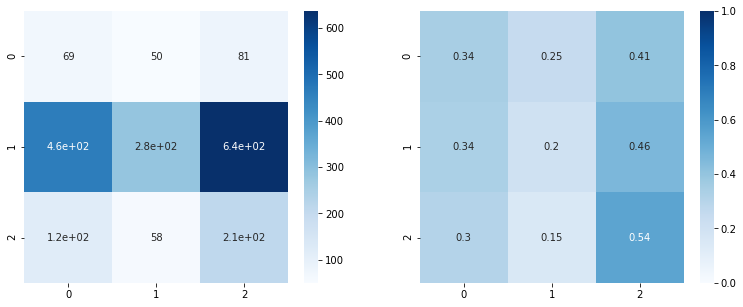

In [40]:
y = df.label
y_vader_textblob = df.polarity_textblob_vader_

conf_matrix = metrics.confusion_matrix(y, y_vader_textblob)
conf_matrix_normalized = np.apply_along_axis(lambda x: x/ x.sum(), 1, conf_matrix)
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.heatmap(conf_matrix, annot=True, ax=ax[0], cmap=sns.color_palette("Blues", as_cmap=True))
sns.heatmap(conf_matrix_normalized, vmin=0, vmax=1, center=.5, annot=True, ax=ax[1], cmap=sns.color_palette("Blues", as_cmap=True))
print(metrics.classification_report(y, y_vader))